In [25]:
library(dplyr)
library(ggplot2)
library(qvalue)

In [6]:
### old results
## MOFA (1:10)
## background with all 10 factors always
## y_gauss, E_gauss

In [7]:
# script: /hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/endodiff.py

In [8]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/MOFA/"

In [9]:
summary_filename = paste0(folder, "MOFA1/summary_endo_eqtl.csv")
df0 = read.csv(summary_filename, row.names = 1)
df0$qv = qvalue(df0$pv, pi0 = 1)$qvalue
nrow(df0)
head(df0,2)

[1] 4410

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000140905_GCSH,1,16,0.21847265,16_81118466_A_G,0.21847265,0.75329505
1,ENSG00000011523_CEP68,2,2,0.00126596,2_65279223_C_T,0.00253192,0.05785372


In [10]:
summary_filename = paste0(folder, "MOFA10/summary_endo_eqtl.csv")
df1 = read.csv(summary_filename, row.names = 1)
df1$qv = qvalue(df1$pv, pi0 = 1)$qvalue
nrow(df1)
head(df1,2)

[1] 4470

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000140905_GCSH,1,16,0.005333072,16_81118466_A_G,0.005333072,0.04905109
1,ENSG00000011523_CEP68,2,2,0.062120960,2_65279223_C_T,0.124241919,0.43319920


In [11]:
### new results
## PCA (1:10)
## background same factors as tested (1:1 or 10:10)
## y_gauss, E_gauss

In [12]:
# script: /hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/April2021/endodiff_PCA.py

In [13]:
folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/April2021/PCA/"

In [14]:
summary_filename = paste0(folder, "PC1/summary.csv")
df2 = read.csv(summary_filename, row.names = 1)
df2$qv = qvalue(df2$pv, pi0 = 1)$qvalue
nrow(df2)
head(df2,2)

[1] 2619

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000011523_CEP68,2,2,0.0006375662,2_65279223_C_T,0.001275132,0.007105472
1,ENSG00000011523_CEP68,2,2,0.0013394110,2_65290842_C_A,0.002678822,0.012802618


In [15]:
summary_filename = paste0(folder, "PC10/summary.csv")
df3 = read.csv(summary_filename, row.names = 1)
df3$qv = qvalue(df3$pv, pi0 = 1)$qvalue
nrow(df3)
head(df3,2)

[1] 2250

,gene,n_snps,chrom,pv_raw,snpID,pv,qv
0,ENSG00000011523_CEP68,2,2,0.30551608,2_65279223_C_T,0.6110322,0.8317135
1,ENSG00000011523_CEP68,2,2,0.09095796,2_65290842_C_A,0.1819159,0.3612629


In [16]:
# compare 1 factor, old vs new
one = inner_join(df0, df2, by = c("snpID","gene","chrom","n_snps"), suffix = c(".old",".new"))
nrow(one)
head(one,2)

Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”

[1] 2619

gene,n_snps,chrom,pv_raw.old,snpID,pv.old,qv.old,pv_raw.new,pv.new,qv.new
ENSG00000011523_CEP68,2,2,0.00126596,2_65279223_C_T,0.00253192,0.05785372,0.0006375662,0.001275132,0.007105472
ENSG00000011523_CEP68,2,2,0.01527360,2_65290842_C_A,0.03054720,0.28970571,0.0013394110,0.002678822,0.012802618


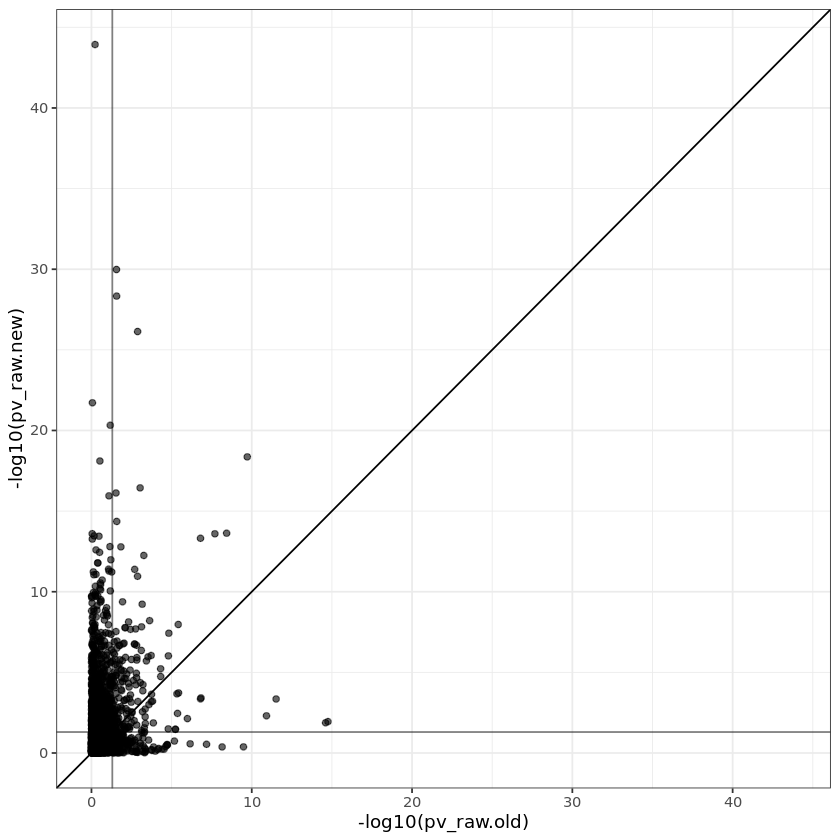

In [17]:
p = ggplot(one, aes(x = -log10(pv_raw.old), y = -log10(pv_raw.new))) + geom_point(alpha = 0.6) 
p = p + geom_abline() + theme_bw()
p = p + geom_vline(xintercept = -log10(0.05), alpha = 0.5) + geom_hline(yintercept = -log10(0.05), alpha = 0.5)
m = -log10(min(min(one$pv_raw.old),min(one$pv_raw.new)))
p = p + xlim(c(0,m)) + ylim(c(0,m))
p

In [18]:
# compare 10 factors, old vs new
ten = inner_join(df1, df3, by = c("snpID","gene","chrom","n_snps"), suffix = c(".old",".new"))
nrow(ten)
head(ten,2)

Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”

[1] 2250

gene,n_snps,chrom,pv_raw.old,snpID,pv.old,qv.old,pv_raw.new,pv.new,qv.new
ENSG00000011523_CEP68,2,2,0.06212096,2_65279223_C_T,0.1242419,0.4331992,0.30551608,0.6110322,0.8317135
ENSG00000011523_CEP68,2,2,0.15564318,2_65290842_C_A,0.3112864,0.7027525,0.09095796,0.1819159,0.3612629


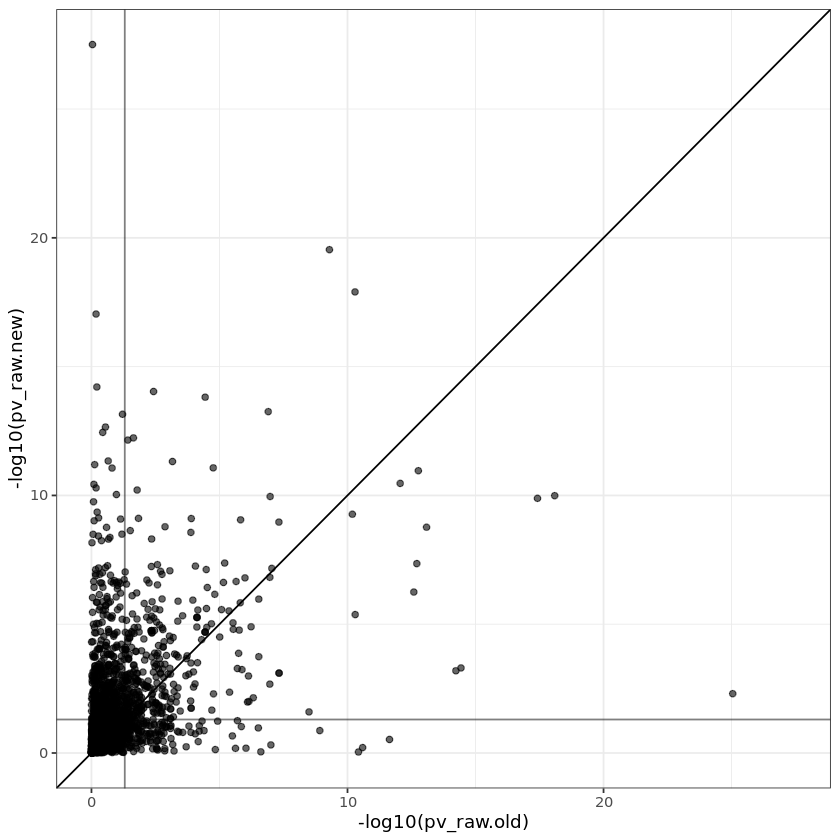

In [19]:
p = ggplot(ten, aes(x = -log10(pv_raw.old), y = -log10(pv_raw.new))) + geom_point(alpha = 0.6) 
p = p + geom_abline() + theme_bw()
p = p + geom_vline(xintercept = -log10(0.05), alpha = 0.5) + geom_hline(yintercept = -log10(0.05), alpha = 0.5)
m = -log10(min(min(ten$pv_raw.old),min(ten$pv_raw.new)))
p = p + xlim(c(0,m)) + ylim(c(0,m))
p

In [20]:
######## Now re-running for first 10 chromosome 2 genes using scripts as above

In [27]:
genes = c('ENSG00000229150_CRYGEP','ENSG00000183891_TTC32', 'ENSG00000144120_TMEM177','ENSG00000138032_PPM1B', 
          'ENSG00000237651_C2orf74','ENSG00000035141_FAM136A', 'ENSG00000196208_GREB1','ENSG00000136717_BIN1', 
          'ENSG00000240344_PPIL3','ENSG00000213160_KLHL23')
length(genes)

[1] 10

In [ ]:
## starting with the 1 factor results (PC1 only, or only MOFA factor 1)

In [28]:
df4 = left_join(df0[df0$gene %in% genes,], df2[df2$gene %in% genes,],
                 by = c("snpID","gene","chrom","n_snps"), suffix = c(".old",".new"))
df4

Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”

gene,n_snps,chrom,pv_raw.old,snpID,pv.old,qv.old,pv_raw.new,pv.new,qv.new
ENSG00000138032_PPM1B,1,2,8.538693e-01,2_44396235_T_G,8.538693e-01,1.000000e+00,1.197405e-03,1.197405e-03,6.773225e-03
ENSG00000229150_CRYGEP,2,2,9.763035e-19,2_208977362_C_A,1.952607e-18,2.870332e-15,NA,NA,NA
ENSG00000229150_CRYGEP,2,2,5.201755e-18,2_208977797_G_T,1.040351e-17,1.146987e-14,NA,NA,NA
ENSG00000213160_KLHL23,3,2,7.641857e-01,2_170575157_G_A,1.000000e+00,1.000000e+00,3.763066e-03,1.128920e-02,4.000867e-02
ENSG00000213160_KLHL23,3,2,4.545527e-01,2_170617443_T_C,1.000000e+00,1.000000e+00,1.677971e-04,5.033914e-04,3.279557e-03
ENSG00000213160_KLHL23,3,2,5.978918e-01,2_170630637_A_G,1.000000e+00,1.000000e+00,8.413408e-04,2.524022e-03,1.221888e-02
ENSG00000035141_FAM136A,3,2,3.960423e-01,2_70426325_C_T,1.000000e+00,1.000000e+00,1.104036e-05,3.312108e-05,3.455941e-04
ENSG00000035141_FAM136A,3,2,2.142827e-01,2_70502930_A_G,6.428480e-01,1.000000e+00,1.267259e-02,3.801776e-02,1.054751e-01
ENSG00000035141_FAM136A,3,2,2.204325e-01,2_70541419_A_G,6.612974e-01,1.000000e+00,2.109551e-03,6.328654e-03,2.499961e-02
ENSG00000183891_TTC32,2,2,9.852826e-01,2_20082172_T_C,1.000000e+00,1.000000e+00,NA,NA,NA


In [ ]:
# output old run:
# Number of donors after kinship intersection: 125
# Sample mapping number of rows BEFORE intersection: 36044
# Sample mapping number of rows AFTER intersection: 35751
# Phenotype shape BEFORE selection: (11231, 36044)
# Phenotype shape AFTER selection: (11231, 35751)

In [ ]:
# (Pdb) len(Ls)
# 10
# (Pdb) Ls[0].shape
# (35751, 125)

In [ ]:
# (Pdb) y.shape
# (35751,)
# (Pdb) M.shape
# (35751, 1)
# (Pdb) E.values[:,0:n_factors].shape
# (35751, 1)

In [ ]:
# saving here: 
"/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/new/mofa1_results_debug/"

In [ ]:
# gene = 'ENSG00000229150_CRYGEP' - slightly different but close enough?
# (Pdb) pv.head()
#   chrom            pv          variant
# 0     2  1.024255e-18  2_208977362_C_A
# 1     2  5.465853e-18  2_208977797_G_T

In [ ]:
# gene = 'ENSG00000183891_TTC32'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.919268  2_20082172_T_C
# 1     2  0.655658  2_20090677_G_A

In [ ]:
# gene = 'ENSG00000144120_TMEM177'
# (Pdb) pv.head()
#   chrom            pv          variant
# 0     2  1.690871e-07  2_120438523_A_G

In [ ]:
# gene = 'ENSG00000138032_PPM1B'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.894768  2_44396235_T_G

In [ ]:
# gene = 'ENSG00000237651_C2orf74'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.682125  2_61372507_A_G
# 1     2  0.810303  2_61381018_C_T
# 2     2  0.672080  2_61400816_G_A

In [ ]:
# gene = 'ENSG00000035141_FAM136A'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.407267  2_70426325_C_T
# 1     2  0.201800  2_70502930_A_G
# 2     2  0.228603  2_70541419_A_G

In [ ]:
# gene = 'ENSG00000196208_GREB1'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.434897  2_11720282_A_G
# 1     2  0.498994  2_11736305_G_A

In [ ]:
# gene = 'ENSG00000136717_BIN1'

In [ ]:
# gene = 'ENSG00000240344_PPIL3'

In [ ]:
# gene = 'ENSG00000213160_KLHL23'

In [ ]:
# output new run:
# Number of donors after kinship intersection: 125
# Sample mapping number of rows BEFORE intersection: 34256
# Sample mapping number of rows AFTER intersection: 33964
# Phenotype shape BEFORE selection: (11231, 34256)
# Phenotype shape AFTER selection: (11231, 33964)

In [ ]:
# (Pdb) len(Ls)
# 1
# (Pdb) Ls[0].shape
# (33964, 125)

In [ ]:
# (Pdb) y.shape
# (33964,)
# (Pdb) M.shape
# (33964, 1)
# (Pdb) E.shape
# (33964, 1)

In [ ]:
# gene = 'ENSG00000229150_CRYGEP'
# (Pdb) pv.head()
#   chrom            pv          variant
# 0     2  6.037734e-26  2_208977362_C_A
# 1     2  2.234445e-22  2_208977797_G_T

In [ ]:
# gene = 'ENSG00000183891_TTC32'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.101845  2_20082172_T_C
# 1     2  0.018911  2_20090677_G_A

In [ ]:
# gene = 'ENSG00000144120_TMEM177'
# (Pdb) pv.head()
#   chrom            pv          variant
# 0     2  4.829657e-14  2_120438523_A_G

In [ ]:
# gene = 'ENSG00000138032_PPM1B'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.001197  2_44396235_T_G

In [ ]:
# gene = 'ENSG00000237651_C2orf74'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.004901  2_61372507_A_G
# 1     2  0.042326  2_61381018_C_T
# 2     2  0.006464  2_61400816_G_A

In [ ]:
# gene = 'ENSG00000035141_FAM136A'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.000011  2_70426325_C_T
# 1     2  0.012673  2_70502930_A_G
# 2     2  0.002110  2_70541419_A_G

In [ ]:
# gene = 'ENSG00000196208_GREB1'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.314819  2_11720282_A_G
# 1     2  0.227613  2_11736305_G_A

In [ ]:
# gene = 'ENSG00000136717_BIN1'
# (Pdb) pv.head()
#   chrom        pv          variant
# 0     2  0.430905  2_127846505_T_C
# 1     2  0.406053  2_127859418_T_C
# 2     2  0.406053  2_127863029_C_T

In [ ]:
# gene = 'ENSG00000240344_PPIL3'
# (Pdb) pv.head()
#   chrom        pv          variant
# 0     2  0.067514  2_201742345_C_T
# 1     2  0.080321  2_201754063_T_C
# 2     2  0.367434  2_201774355_T_C

In [ ]:
# gene = 'ENSG00000213160_KLHL23'
#   chrom        pv          variant
# 0     2  0.003763  2_170575157_G_A
# 1     2  0.000168  2_170617443_T_C
# 2     2  0.000841  2_170630637_A_G

In [ ]:
## next, the 10-factor results (PC1:10, or only MOFA factors 1:10)

In [29]:
df5 = left_join(df1[df1$gene %in% genes,], df3[df3$gene %in% genes,],
                 by = c("snpID","gene","chrom","n_snps"), suffix = c(".old",".new"))
df5

Warning message:
“Column `snpID` joining factors with different levels, coercing to character vector”Warning message:
“Column `gene` joining factors with different levels, coercing to character vector”

gene,n_snps,chrom,pv_raw.old,snpID,pv.old,qv.old,pv_raw.new,pv.new,qv.new
ENSG00000138032_PPM1B,1,2,2.081732e-01,2_44396235_T_G,2.081732e-01,5.680916e-01,1.916338e-05,1.916338e-05,2.661581e-04
ENSG00000229150_CRYGEP,2,2,2.492542e-40,2_208977362_C_A,4.985085e-40,1.114166e-36,NA,NA,NA
ENSG00000229150_CRYGEP,2,2,2.084663e-41,2_208977797_G_T,4.169326e-41,1.863689e-37,NA,NA,NA
ENSG00000213160_KLHL23,3,2,2.940980e-01,2_170575157_G_A,8.822939e-01,1.000000e+00,3.829416e-02,1.148825e-01,2.616251e-01
ENSG00000213160_KLHL23,3,2,4.148134e-02,2_170617443_T_C,1.244440e-01,4.332281e-01,2.532561e-02,7.597682e-02,1.964918e-01
ENSG00000213160_KLHL23,3,2,2.016330e-02,2_170630637_A_G,6.048990e-02,2.787524e-01,5.472915e-04,1.641874e-03,1.055491e-02
ENSG00000035141_FAM136A,3,2,7.716807e-01,2_70426325_C_T,1.000000e+00,1.000000e+00,8.694910e-01,1.000000e+00,1.000000e+00
ENSG00000035141_FAM136A,3,2,2.723836e-01,2_70502930_A_G,8.171508e-01,1.000000e+00,3.420843e-01,1.000000e+00,1.000000e+00
ENSG00000035141_FAM136A,3,2,5.167523e-01,2_70541419_A_G,1.000000e+00,1.000000e+00,8.230128e-01,1.000000e+00,1.000000e+00
ENSG00000183891_TTC32,2,2,4.030850e-05,2_20082172_T_C,8.061699e-05,1.726988e-03,NA,NA,NA


In [ ]:
## old run

In [ ]:
## new run

In [ ]:
# (Pdb) y.shape
# (33964,)
# (Pdb) M.shape
# (33964, 1)
# (Pdb) E.shape
# (33964, 10)
# (Pdb) len(Ls)
# 10
# (Pdb) Ls[0].shape
# (33964, 125)

In [ ]:
# gene = 'ENSG00000229150_CRYGEP'
# (Pdb) pv.head()
#   chrom            pv          variant
# 0     2  1.334417e-15  2_208977362_C_A
# 1     2  3.168710e-16  2_208977797_G_T

In [ ]:
# gene = 'ENSG00000183891_TTC32'
# (Pdb) pv.head()
#   chrom            pv         variant
# 0     2  1.317321e-04  2_20082172_T_C
# 1     2  5.569644e-08  2_20090677_G_A

In [ ]:
# gene = 'ENSG00000144120_TMEM177'
# (Pdb) pv.head()
#   chrom            pv          variant
# 0     2  3.412719e-11  2_120438523_A_G

In [ ]:
# gene = 'ENSG00000138032_PPM1B'
# (Pdb) pv.head()
#   chrom        pv         variant
# 0     2  0.000019  2_44396235_T_G

In [ ]:
# gene = 'ENSG00000237651_C2orf74'

In [ ]:
# gene = 'ENSG00000035141_FAM136A'

In [ ]:
# gene = 'ENSG00000196208_GREB1'

In [ ]:
# gene = 'ENSG00000136717_BIN1'

In [ ]:
# gene = 'ENSG00000240344_PPIL3'

In [ ]:
# gene = 'ENSG00000213160_KLHL23'